# I. Clustering de chansons

In [1]:
import util
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

conn, cur = util.connexion()

## 1. Etude des corrélations

In [3]:
df = pd.read_sql_query('SELECT titre, public."NbPassagesMC"(titre,current_date), public."NbPassages50"(titre,current_date),	public."NbPassages40"(titre,current_date), public."NbPassages30"(titre,current_date), public."NbPassages20"(titre,current_date), public."NbPassages20k"(titre,current_date) FROM public."Chanson"',con=conn)
df

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
0,J'ai cherché,8,6,5,0,0,0
1,La fête (Amir),0,4,4,0,0,2
2,Longtemps,4,0,5,2,3,0
3,Toujours là pour toi,0,2,0,0,2,1
4,Sauver l'amour,0,5,5,2,1,2
...,...,...,...,...,...,...,...
2264,Dis-moi comment,0,0,0,1,1,0
2265,Dominique,0,0,0,1,0,0
2266,Comme toi,2,3,0,0,0,0
2267,Moi aimer toi,5,6,2,1,1,0


In [4]:
df[df["titre"] == "Clown"]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
1381,Clown,0,4,2,3,0,3


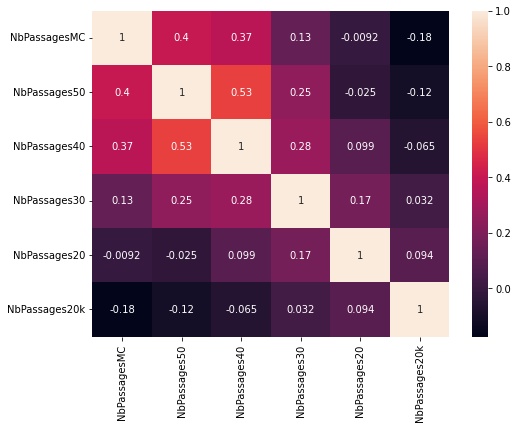

In [5]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## 2. Clustering

### KMeans

In [6]:
titres = ['Envole-moi', 'Allumer le feu', 'Évidemment (France Gall)', 'Au fur et à mesure']
df[df['titre'].isin(titres)]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
628,Évidemment (France Gall),3,0,1,1,1,1
648,Envole-moi,2,6,2,0,0,2
2047,Allumer le feu,1,6,3,3,0,0
2242,Au fur et à mesure,1,0,1,1,2,1


In [7]:
kmeans = KMeans(n_clusters=3).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_

for i in range(3):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(15)

[[0.14734089 0.31560593 0.51612903 0.7994769  1.04969486 0.46904969]
 [2.38742394 4.23732252 3.26369168 2.15010142 1.25963489 0.67342799]
 [0.16375199 0.71224165 1.08903021 1.43720191 1.82829889 3.23370429]]
Nombre de chansons dans la classe 0 : 1147
Nombre de chansons dans la classe 1 : 493
Nombre de chansons dans la classe 2 : 629


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
1847,Maman,6,1,3,2,2,1,1
911,La maman des poissons,0,0,0,0,0,0,0
1190,Sensualité,5,2,7,2,1,0,1
41,Hasta luego,0,1,1,0,0,3,2
1671,Si demain (turn around),0,2,1,1,3,0,0
207,Madeleine,0,0,1,3,2,3,2
1420,Amélie Colbert,0,0,1,0,1,0,0
65,L'épervier,0,1,0,0,1,1,0
2233,Butterfly (Danyel Gérard),0,0,0,0,1,0,0
2162,La maison où j'ai grandi,0,0,0,1,0,3,2


In [62]:
n = 10

kmeans = KMeans(n_clusters=n).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_

[[0.18032787 0.51803279 0.72786885 0.76393443 2.97704918 0.63934426]
 [0.68965517 7.22988506 4.11494253 1.73563218 0.96551724 0.50574713]
 [0.02604167 0.546875   0.90625    1.08854167 1.50520833 4.81770833]
 [4.98947368 5.84210526 2.82105263 1.21052632 0.61052632 0.38947368]
 [0.484375   4.1875     1.8125     2.8671875  1.3203125  1.1640625 ]
 [0.03358779 0.18778626 0.33587786 0.56183206 0.43358779 0.23969466]
 [0.21022727 0.77840909 1.10795455 3.5        2.25       1.43181818]
 [0.47183099 2.03521127 4.43661972 1.94366197 1.92957746 1.38028169]
 [4.25657895 1.56578947 2.64473684 1.92763158 1.51315789 0.72368421]
 [0.05934718 0.38278932 0.54896142 0.75074184 0.83976261 2.48961424]]


In [95]:
df[df["titre"] == "Bonne idée"]
df[df["cluster"] == 5].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster,cluster2
1330,L'heure de la sortie,0,0,0,0,0,1,5,5
1351,Il va y avoir du sport,0,0,0,2,1,0,5,5
1324,Tu vas me quitter,0,0,0,1,0,0,5,5
1326,Moi je suis tango,0,0,1,0,0,0,5,5
2051,Hey lovely lady,0,0,0,1,0,0,5,5
863,Initials B.B.,0,0,0,0,1,0,5,5
2038,Un été français,0,0,0,3,0,0,5,5
329,Frida oum papa,0,0,1,0,0,1,5,5
1581,À corps perdu,0,0,1,0,0,0,5,5
778,Sur le fil,0,0,0,2,0,0,5,5


In [88]:
centro = centroids
centro = centro[:, 0].argsort()
dico = {centro[i]: i for i in range(0, 10)}
# for i in range(0, 10):
#     dico[centro[i]] = i
#     dico[str(centro[i])] = i
dico

{2: 0, 5: 1, 9: 2, 0: 3, 6: 4, 7: 5, 4: 6, 1: 7, 8: 8, 3: 9}

In [98]:
df.sample(10)
df["cluster2"] = df["cluster"].map(dico)
df[df["titre"] == "Bonne idée"]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster,cluster2
1669,Bonne idée,0,2,0,1,1,0,5,1


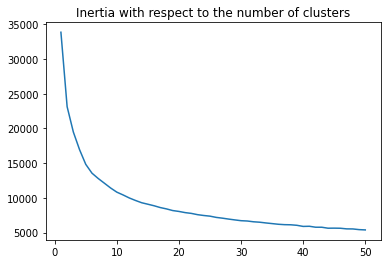

In [8]:
inertias = []
clusters = []

for k in range(1, 51):
    kmeans = KMeans(n_clusters=k).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
    inertias.append(kmeans.inertia_)
    clusters.append(k)

plt.plot(clusters, inertias)
plt.title("Inertia with respect to the number of clusters")
plt.show()

In [10]:
for i in range(n):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df[df["titre"] == "Toi mon amour"]

Nombre de chansons dans la classe 0 : 185
Nombre de chansons dans la classe 1 : 125
Nombre de chansons dans la classe 2 : 82
Nombre de chansons dans la classe 3 : 146
Nombre de chansons dans la classe 4 : 758
Nombre de chansons dans la classe 5 : 96
Nombre de chansons dans la classe 6 : 132
Nombre de chansons dans la classe 7 : 225
Nombre de chansons dans la classe 8 : 341
Nombre de chansons dans la classe 9 : 179


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
930,Toi mon amour,0,1,0,2,4,2,7


On détermine dans chaque cluster combien il y a de mêmes chansons, de 20k et de random

In [11]:
for c in range(n):
    total = df[df['cluster']==c]['titre'].count()
    mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
    vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    print("Pour le cluster {0} qui contient {1} chansons".format(c, total))
    print("Nombre de MC : {0}".format(mc))
    print("Nombre de 20k : {0}".format(vingtk))
    print("Nombre de random : {0}".format(reste))
    print("Proportion 20k : {0}".format(round(vingtk/total,3)))
    print()

Pour le cluster 0 qui contient 185 chansons
Nombre de MC : 5
Nombre de 20k : 180
Nombre de random : 0
Proportion 20k : 0.973

Pour le cluster 1 qui contient 125 chansons
Nombre de MC : 38
Nombre de 20k : 54
Nombre de random : 33
Proportion 20k : 0.432

Pour le cluster 2 qui contient 82 chansons
Nombre de MC : 29
Nombre de 20k : 24
Nombre de random : 29
Proportion 20k : 0.293

Pour le cluster 3 qui contient 146 chansons
Nombre de MC : 146
Nombre de 20k : 0
Nombre de random : 0
Proportion 20k : 0.0

Pour le cluster 4 qui contient 758 chansons
Nombre de MC : 24
Nombre de 20k : 184
Nombre de random : 550
Proportion 20k : 0.243

Pour le cluster 5 qui contient 96 chansons
Nombre de MC : 96
Nombre de 20k : 0
Nombre de random : 0
Proportion 20k : 0.0

Pour le cluster 6 qui contient 132 chansons
Nombre de MC : 31
Nombre de 20k : 72
Nombre de random : 29
Proportion 20k : 0.545

Pour le cluster 7 qui contient 225 chansons
Nombre de MC : 32
Nombre de 20k : 114
Nombre de random : 79
Proportion 20k 

### Etude des clusters

337


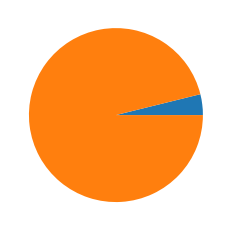

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
2166,Ainsi soit je,0,0,0,0,0,3,9
622,Revoir,0,0,0,1,1,2,9
528,Doucement,0,0,1,0,0,3,9
1930,C'est si bon,0,0,0,0,1,2,9
1067,C'est la vie mon chéri,0,0,0,0,2,2,9
256,Le portrait,0,1,1,1,2,2,9
2140,Je reviendrai à Montréal,0,0,0,2,3,3,9
643,Ton visage,0,0,1,2,0,3,9
489,Le jour de nos fiançailles,0,1,0,0,0,2,9
2018,Adélaïde,0,0,0,1,1,2,9


In [84]:
c = 9
total = df[df['cluster']==c]['titre'].count()
mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
plt.pie([mc, vingtk, reste])
print(total)
plt.show()

df[df['cluster'] == c].sample(10)

Les mêmes chansons

In [18]:
try:
    df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)].sample(10)
except ValueError:
    print("Il n'y a pas de même chansons")

Il n'y a pas de même chansons


Les 20k

In [14]:
df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
2119,Quand je t'aime,0,0,1,2,2,7,0
1000,Malheur à celui qui blesse un enfant,0,0,0,0,2,4,0
1188,Basique,0,0,0,1,1,5,0
332,Avec classe,0,2,1,2,3,4,0
125,Demain (BigFlo et Oli),0,0,1,3,3,6,0
158,Ma plus belle histoire d'amour,0,0,1,1,1,4,0
597,Joy,0,2,1,0,2,6,0
961,Enfants de tous pays,0,0,2,0,2,6,0
2064,La danse des canards,0,0,1,0,3,4,0
767,J'écoute de la musique saoûle,0,1,0,2,1,6,0


Les random

In [17]:
try:
    df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)
    ok = True
except ValueError:
    print("Il n'y a pas de chansons random dans ce cluster")
    ok = False

Il n'y a pas de chansons random dans ce cluster


## 3. Insertion des clusters en base

In [17]:
def updateQuery(c, titre):
    titre = titre.replace("'","''")
    return "UPDATE public.\"Chanson\" SET \"clusterID\"= {} WHERE titre = '{}';".format(c, titre)

for row in df.iterrows():
    print(row[1]['titre'], " : ", row[1]['cluster'])
    print(updateQuery(row[1]['cluster'], row[1]['titre']))
    cur.execute(updateQuery(row[1]['cluster'], row[1]['titre']))
    conn.commit()

Vous permettez Monsieur  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Vous permettez Monsieur';
Ohio  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Ohio';
Baïla  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Baïla';
Respect  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Respect';
Simple et funky  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Simple et funky';
Fever  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Fever';
La thune  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'La thune';
Oui ou non  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Oui ou non';
Ta reine  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Ta reine';
Tout oublier  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Tout oublier';
Maman me dit  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Maman me dit';
La neige au Sahara  :  0
UPDATE pu

In [18]:
cur.execute('SELECT id, titre, "année", id_artiste, nb_mots, "clusterID" FROM public."Chanson"')

# II. Clustering d'artistes

On cherche à clusteriser les artistes en plusieurs groupes, afin de créer une variables catégorielle contenant de l'information sur l'artiste

In [13]:
requete = 'SELECT a.artiste, c."année" - c."année"%10 AS decennie, count(*) AS nbChansons FROM public."Artiste" AS a JOIN public."Chanson" AS c ON a.id_artiste = c.id_artiste WHERE c."année" IS NOT NULL GROUP BY a.artiste, decennie'
df = pd.read_sql_query(requete, con=conn)
df[['decennie']] = df[['decennie']].astype("int32")
df

,artiste,decennie,nbchansons
0,Nougaro Claude,1970,2
1,François Claude,1960,9
2,Trois Cafés Gourmands,2010,1
3,Piaf Édith,1950,8
4,Noir Désir,1980,1
...,...,...,...
915,Renaud,1980,12
916,Brillant Dany,1990,5
917,Dutronc Jacques,1970,2
918,Richard Zachary,1970,1


On pivote pour obtenir comme feature pour chaque artiste le nombre de chanson sortie dans chaque décennie

In [14]:
df = df.pivot(index = 'artiste', columns = 'decennie', values = 'nbchansons')
df = df.replace(np.NaN, 0)
df

decennie,1870,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
artiste,,,,,,,,,,,,
1789 Les Amants de la Bastille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2 Be 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
47TER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam & Ève,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adamo Salvatore,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zenatti Julie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
À caus' des garçons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Élie Antoine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df.columns

Int64Index([1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
            2020],
           dtype='int64', name='decennie')

In [39]:
df[[1980]].loc['Indochine']

decennie
1980    6.0
Name: Indochine, dtype: float64

On clusterise sur les colonnes

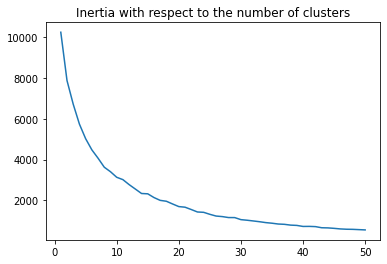

In [45]:
inertias = []
clusters = []

for k in range(1, 51):
    kmeans = KMeans(n_clusters=k).fit(df[[1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]])
    inertias.append(kmeans.inertia_)
    clusters.append(k)

plt.plot(clusters, inertias)
plt.title("Inertia with respect to the number of clusters")
plt.show()

Essayons avec 20 clusters

In [46]:
kmeans = KMeans(n_clusters=20).fit(df[[1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]])
df['cluster'] = kmeans.labels_

In [61]:
df[df.cluster == 10]

decennie,1870,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,cluster
artiste,,,,,,,,,,,,,
BB Brunes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,10
Bent Amel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,10
Bruni Carla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Bénabar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,10
Cali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Corneille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Diam's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10
Fiori Patrick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,10
Grégoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,10
